##Question 1

In [1]:
from scipy.stats import norm

# Given parameters
mu = 42          # mean
sigma = 8        # standard deviation

# Define the range
x1 = 20
x2 = 30

# Calculate cumulative probabilities
p1 = norm.cdf(x1, loc=mu, scale=sigma)
p2 = norm.cdf(x2, loc=mu, scale=sigma)

# Probability that Z-Phone lasts between 20 and 30 months
probability = p2 - p1

print(f"Probability that Z-Phone lasts between 20 and 30 months: {probability:.4f} ({probability*100:.2f}%)")


Probability that Z-Phone lasts between 20 and 30 months: 0.0638 (6.38%)


##Question 2

In [19]:
pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 9.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=9637f7465d1db574eacc8c843a13f2ef5241eb299f336a171f9299c673ea94c7
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


Data with censoring info:
   Time  Observed
0    75         1
1    63         1
2   100         0
3    36         1
4    51         1
5    45         1
6    80         1
7    90         1

Simple Median (including censored value): 69.0

Kaplan-Meier estimated median survival time: 75.0


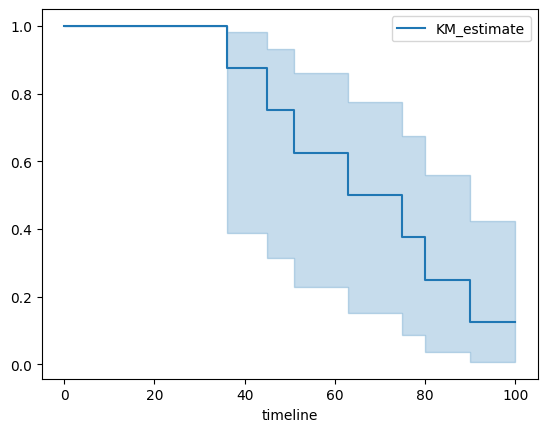

In [21]:
import numpy as np
import pandas as pd

# data
raw_times = ['75', '63', '100+', '36', '51', '45', '80', '90']

# Separate event times and censoring indicator
failure_times = []
censoring = []

for time in raw_times:
    if '+' in time:
        failure_times.append(int(time.replace('+', '')))
        censoring.append(0)  # 0 = right-censored
    else:
        failure_times.append(int(time))
        censoring.append(1)  # 1 = event observed

# Create Dataframe
df = pd.DataFrame({
    'Time': failure_times,
    'Observed': censoring
})

print("Data with censoring info:")
print(df)

# Compute the median (ignoring censoring for a basic approach)
# Sort the times, including censored one for median location
sorted_times = sorted(failure_times)
n = len(sorted_times)

if n % 2 == 0:
    median_val = (sorted_times[n//2 - 1] + sorted_times[n//2]) / 2
else:
    median_val = sorted_times[n//2]

print(f"\nSimple Median (including censored value): {median_val}")

# Optional: Compute Kaplan-Meier estimate (if required)
try:
    from lifelines import KaplanMeierFitter
    kmf = KaplanMeierFitter()
    kmf.fit(df['Time'], event_observed=df['Observed'])

    print("\nKaplan-Meier estimated median survival time:", kmf.median_survival_time_)
    kmf.plot_survival_function()
except ImportError:
    print("\nInstall `lifelines` to compute KM estimate: pip install lifelines")


##Question 3

Mean: 2.42 seconds
Sample Variance: 0.2854
Sample Standard Deviation: 0.5342


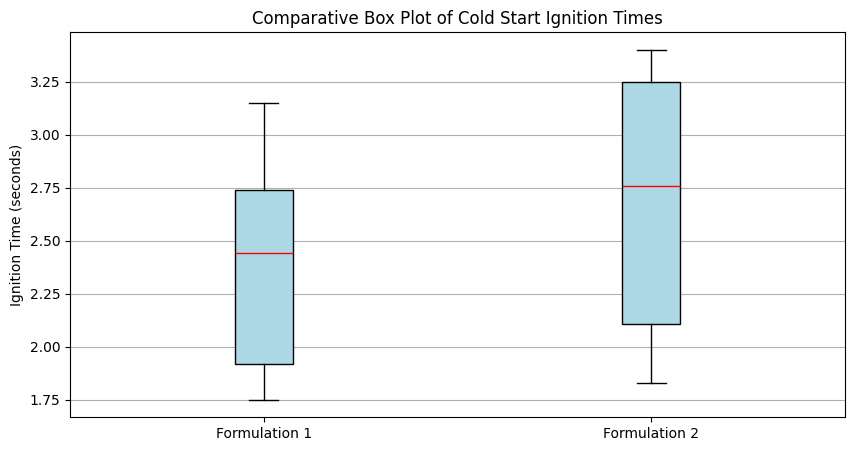

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset 1: First gasoline formulation
data1 = np.array([1.75, 1.92, 2.62, 2.35, 3.09, 3.15, 2.53, 1.91])

# Dataset 2: Second gasoline formulation
data2 = np.array([1.83, 1.99, 3.13, 3.29, 2.65, 2.87, 3.40, 2.46, 1.89, 3.35])

# Statistics for Dataset 1
mean1 = np.mean(data1)
var1 = np.var(data1, ddof=1)  # sample variance
std1 = np.std(data1, ddof=1)  # sample std deviation

print(f"Mean: {mean1:.2f} seconds")
print(f"Sample Variance: {var1:.4f}")
print(f"Sample Standard Deviation: {std1:.4f}")

# Box Plot (Comparative)
plt.figure(figsize=(10, 5))
plt.boxplot([data1, data2], tick_labels=['Formulation 1', 'Formulation 2'], patch_artist=True,
            boxprops=dict(facecolor="lightblue"), medianprops=dict(color="red"))
plt.title("Comparative Box Plot of Cold Start Ignition Times")
plt.ylabel("Ignition Time (seconds)")
plt.grid(axis='y')
plt.show()

##Questions 4

In [ ]:
import pandas as pd

# Patient records data
data = {
    'Name': ['P. Lee', 'R. Jones', 'J. Smith', 'A. Patel', 'M. Owen', 'S. Green', 'N. Cook', 'W. Hands', 'P. Rice', 'F. Marsh'],
    'Weight (kg)': [50, 115, 96, 41, 79, 109, 73, 104, 64, 136],
    'Height (m)': [1.52, 1.77, 1.83, 1.55, 1.82, 1.89, 1.76, 1.71, 1.74, 1.78],
    'Systolic BP': [68, 110, 88, 76, 65, 114, 108, 107, 101, 121],
    'Diastolic BP': [112, 154, 136, 125, 105, 159, 136, 145, 132, 165],
    'Diabetes': [0, 1, 0, 0, 0, 1, 0, 1, 0, 1]
}

df = pd.DataFrame(data)

# (a) Min-max normalization of Weight
df['Weight (Normalized)'] = (df['Weight (kg)'] - df['Weight (kg)'].min()) / (df['Weight (kg)'].max() - df['Weight (kg)'].min())

# (b) Binning Weight into categories
def weight_category(w):
    if w < 60:
        return 'Low'
    elif w <= 100:
        return 'Medium'
    else:
        return 'High'

df['Weight Category'] = df['Weight (kg)'].apply(weight_category)

# (c) Calculate BMI
df['BMI'] = df['Weight (kg)'] / (df['Height (m)'] ** 2)

print(df[['Name', 'Weight (kg)', 'Weight (Normalized)', 'Weight Category', 'Height (m)', 'BMI']])

       Name  Weight (kg)  Weight (Normalized) Weight Category  Height (m)  \
0    P. Lee           50             0.094737             Low        1.52   
1  R. Jones          115             0.778947            High        1.77   
2  J. Smith           96             0.578947          Medium        1.83   
3  A. Patel           41             0.000000             Low        1.55   
4   M. Owen           79             0.400000          Medium        1.82   
5  S. Green          109             0.715789            High        1.89   
6   N. Cook           73             0.336842          Medium        1.76   
7  W. Hands          104             0.663158            High        1.71   
8   P. Rice           64             0.242105          Medium        1.74   
9  F. Marsh          136             1.000000            High        1.78   

         BMI  
0  21.641274  
1  36.707204  
2  28.666129  
3  17.065557  
4  23.849777  
5  30.514263  
6  23.566632  
7  35.566499  
8  21.138856  
9 

##Question 5

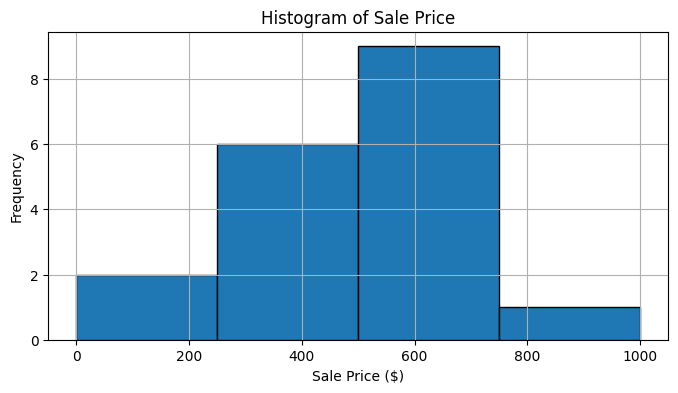


Contingency Table:
 Product Category  Desktop  Laptop  Printer  Scanner
Store                                              
New York, NY            3       1        2        4
Washington, DC          2       2        2        2

Grouped by Customer:
            count   sum
Customer              
B. March       3  1700
E. Sims        1   700
G. Hinton      4  2150
H. Fu          1   450
H. Taylor      1   400
J. Bain        1   500
L. Nye         2   900
P. Judd        2   900
S. Cann        1   600
T. Goss        2   750

Grouped by Store:
                 count   mean
Store                       
New York, NY       10  485.0
Washington, DC      8  525.0

Grouped by Product Category:
                   count  sum
Product Category            
Desktop               5  295
Laptop                3  470
Printer               4  360
Scanner               6  640


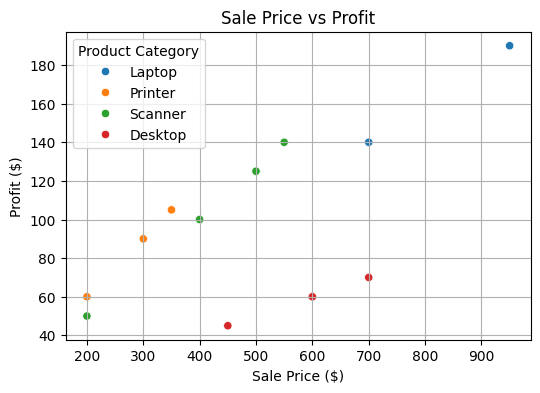

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# data
data = {
    'Customer': ['B. March', 'B. March', 'B. March', 'J. Bain', 'T. Goss', 'T. Goss', 'L. Nye', 'L. Nye', 'S. Cann',
                 'E. Sims', 'P. Judd', 'P. Judd', 'G. Hinton', 'G. Hinton', 'G. Hinton', 'G. Hinton', 'H. Fu', 'H. Taylor'],
    'Store': ['New York, NY']*3 + ['New York, NY'] + ['Washington, DC']*2 + ['New York, NY']*2 + ['Washington, DC'] +
             ['Washington, DC'] + ['New York, NY']*2 + ['Washington, DC']*4 + ['New York, NY']*2,
    'Product Category': ['Laptop', 'Printer', 'Scanner', 'Scanner', 'Printer', 'Scanner', 'Desktop', 'Printer',
                         'Desktop', 'Laptop', 'Desktop', 'Scanner', 'Laptop', 'Desktop', 'Printer', 'Scanner', 'Desktop', 'Scanner'],
    'Sale Price ($)': [950, 350, 400, 500, 200, 550, 600, 300, 600, 700, 700, 200, 700, 600, 350, 500, 450, 400],
    'Profit ($)': [190, 105, 100, 125, 60, 140, 60, 90, 60, 140, 70, 50, 140, 60, 105, 125, 45, 100]
}

df = pd.DataFrame(data)

# (a) Histogram of Sale Price
plt.figure(figsize=(8, 4))
plt.hist(df['Sale Price ($)'], bins=[0, 250, 500, 750, 1000], edgecolor='black')
plt.title('Histogram of Sale Price')
plt.xlabel('Sale Price ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# (b) Contingency table of Store vs Product Category
contingency = pd.crosstab(df['Store'], df['Product Category'])
print("\nContingency Table:\n", contingency)

# (c) i. Group by Customer
print("\nGrouped by Customer:\n", df.groupby('Customer')['Sale Price ($)'].agg(['count', 'sum']))

# ii. Group by Store
print("\nGrouped by Store:\n", df.groupby('Store')['Sale Price ($)'].agg(['count', 'mean']))

# iii. Group by Product Category
print("\nGrouped by Product Category:\n", df.groupby('Product Category')['Profit ($)'].agg(['count', 'sum']))

# (d) Scatterplot: Sale Price vs Profit
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Sale Price ($)', y='Profit ($)', hue='Product Category')
plt.title('Sale Price vs Profit')
plt.grid(True)
plt.show()

Frequency of samples per class:
 Classes
A    151
B    123
C     68
Name: count, dtype: int64

Data Description:
         Feature 1   Feature 2   Feature 3    Feature 4
count  342.000000  342.000000  342.000000   342.000000
mean    43.921930   17.151170  200.915205  4201.754386
std      5.459584    1.974793   14.061714   801.954536
min     32.100000   13.100000  172.000000  2700.000000
25%     39.225000   15.600000  190.000000  3550.000000
50%     44.450000   17.300000  197.000000  4050.000000
75%     48.500000   18.700000  213.000000  4750.000000
max     59.600000   21.500000  231.000000  6300.000000

Interquartile Range (IQR):
 Feature 1       9.275
Feature 2       3.100
Feature 3      23.000
Feature 4    1200.000
dtype: float64


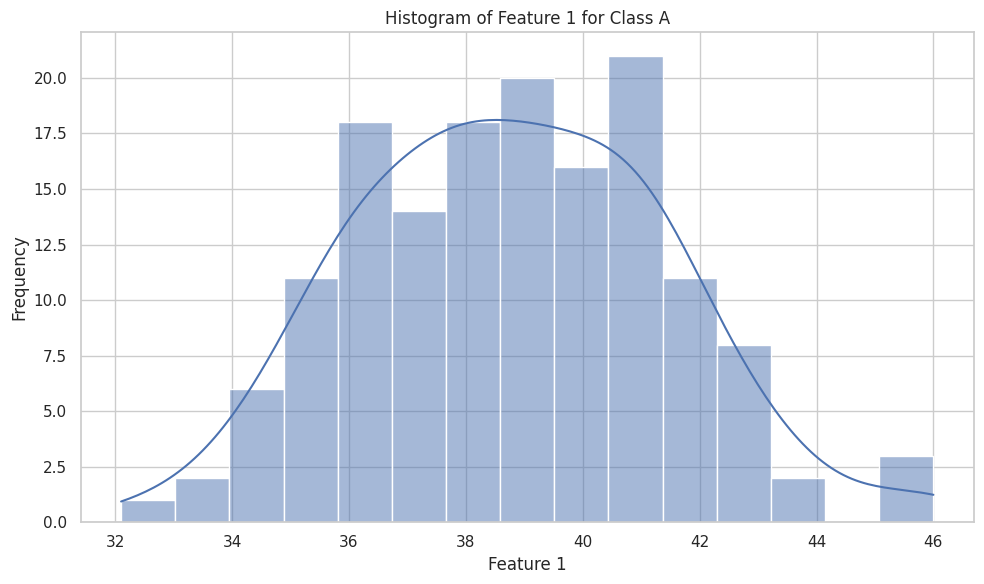

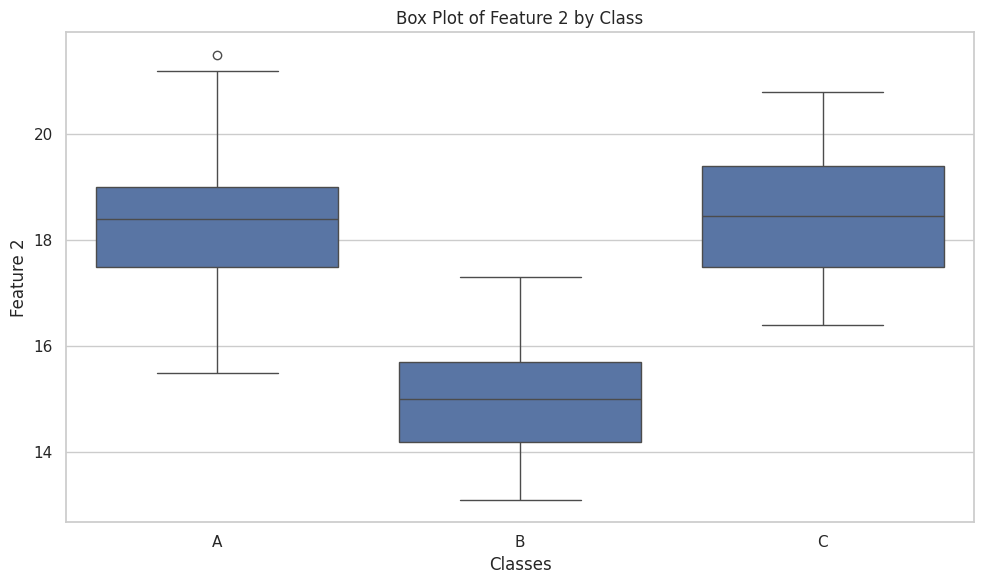

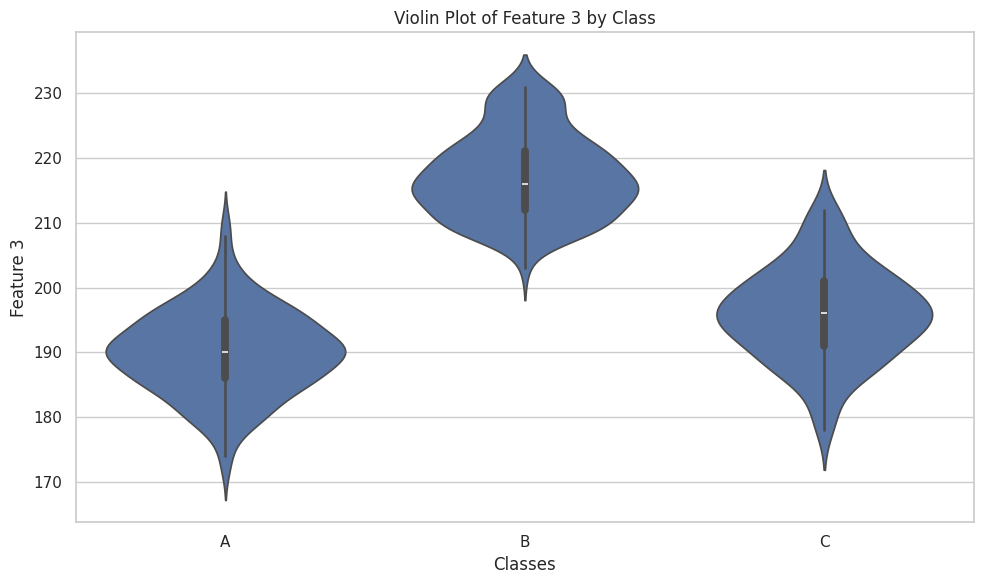

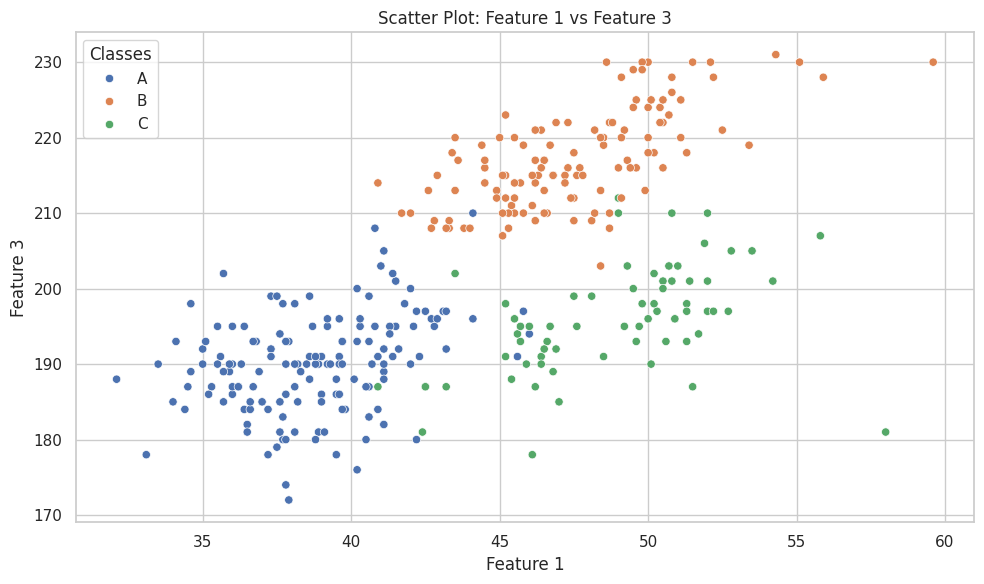

<ipython-input-2-50a6d21031ba>:62: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


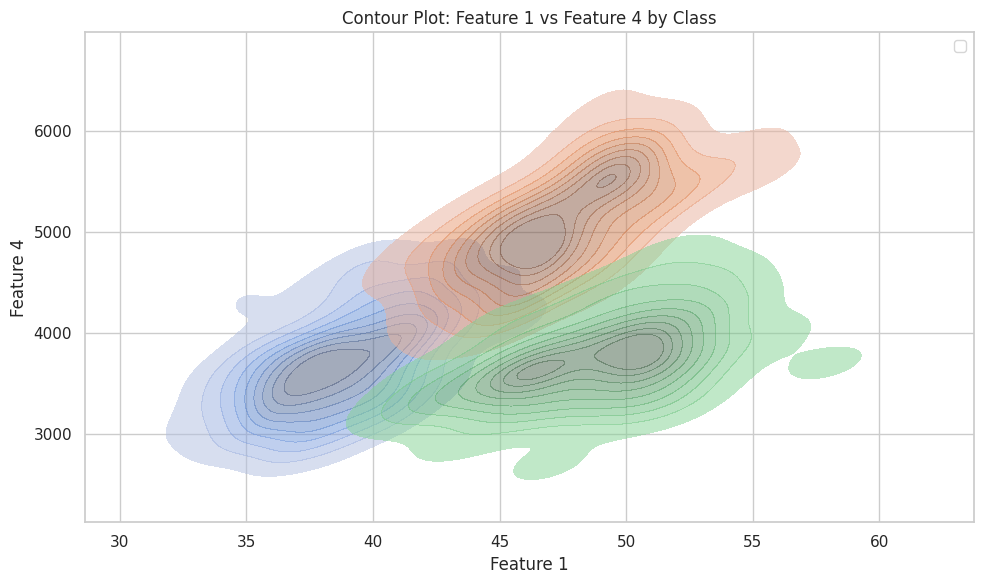

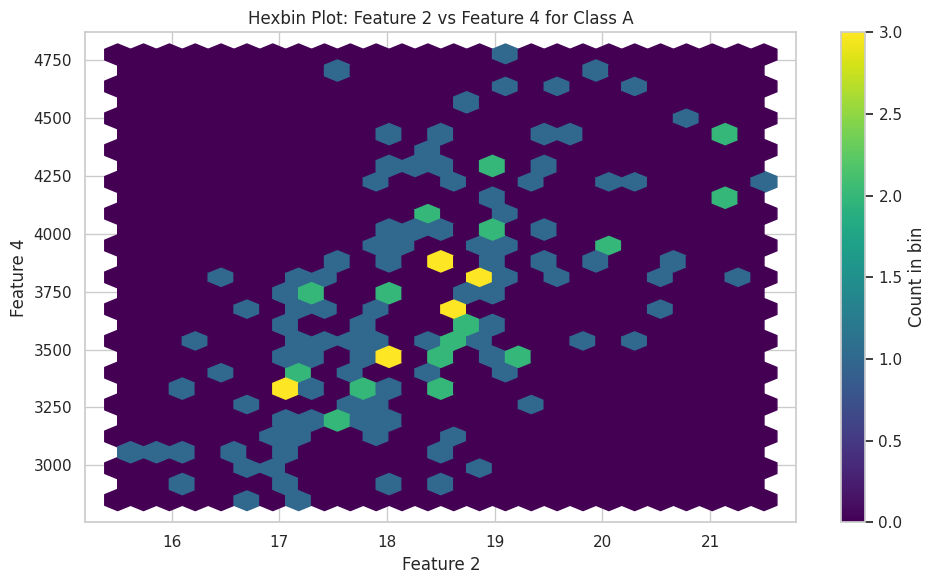

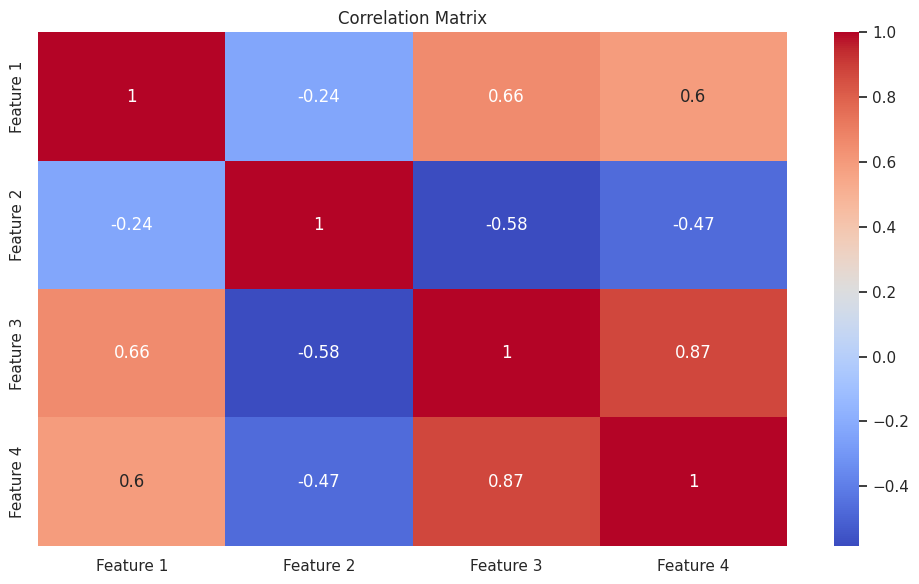

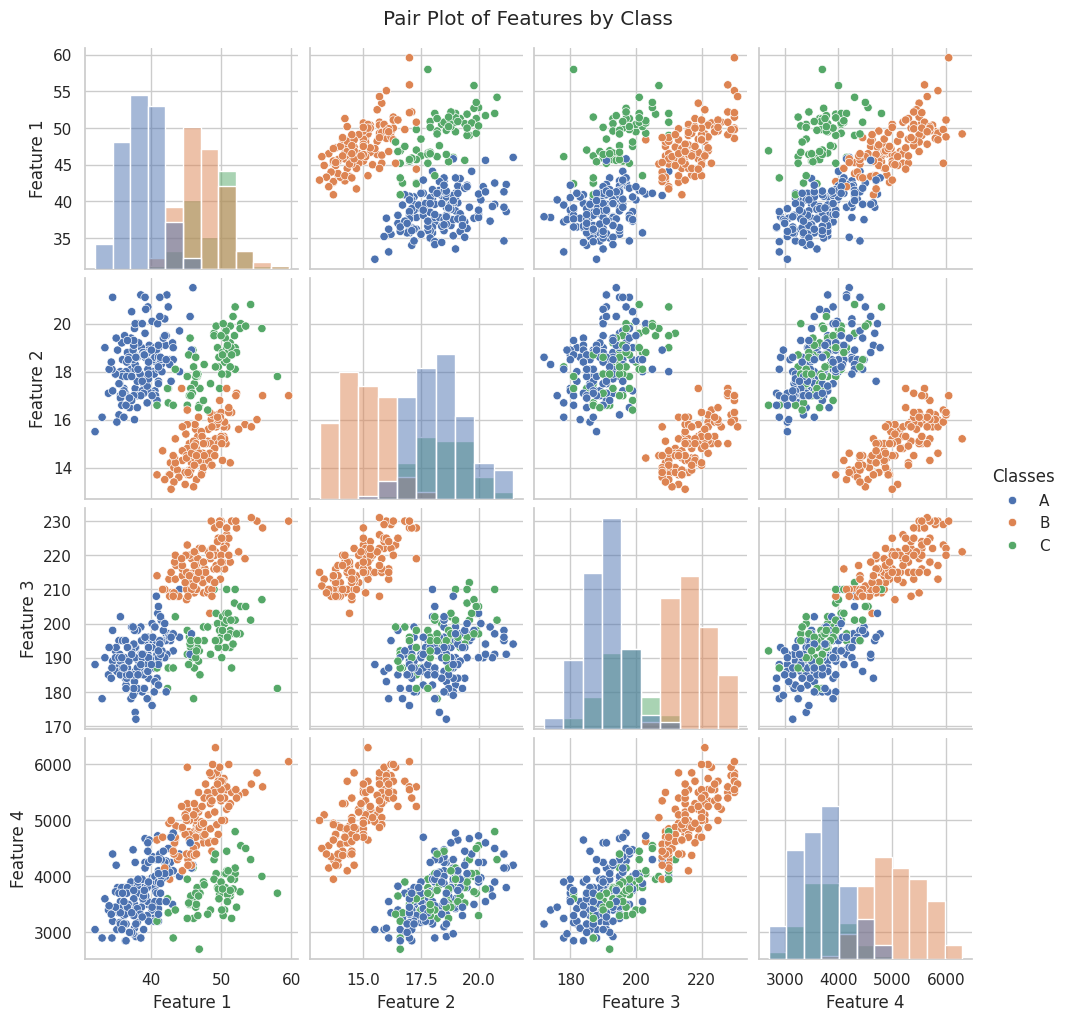

In [ ]:
# A1_EDA.ipynb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load dataset
df = pd.read_csv("A1.csv")

# 3. Frequency of samples for each class
frequency = df['Classes'].value_counts()
print("Frequency of samples per class:\n", frequency)

# 4. Data description and Interquartile Range (IQR)
description = df[['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4']].describe()
iqr = description.loc['75%'] - description.loc['25%']
print("\nData Description:\n", description)
print("\nInterquartile Range (IQR):\n", iqr)

# 5. Histogram of Feature 1 for Class A
plt.figure()
sns.histplot(df[df['Classes'] == 'A']['Feature 1'], bins=15, kde=True)
plt.title('Histogram of Feature 1 for Class A')
plt.xlabel('Feature 1')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 6. Box plot for Feature 2 for each class
plt.figure()
sns.boxplot(x='Classes', y='Feature 2', data=df)
plt.title('Box Plot of Feature 2 by Class')
plt.tight_layout()
plt.show()

# 7. Violin plot for Feature 3 for each class
plt.figure()
sns.violinplot(x='Classes', y='Feature 3', data=df)
plt.title('Violin Plot of Feature 3 by Class')
plt.tight_layout()
plt.show()

# 8. Scatter plot between Feature 1 and Feature 3
plt.figure()
sns.scatterplot(x='Feature 1', y='Feature 3', hue='Classes', data=df)
plt.title('Scatter Plot: Feature 1 vs Feature 3')
plt.tight_layout()
plt.show()

# 9. Contour plot between Feature 1 and Feature 4 for each class
plt.figure()
for cls in df['Classes'].unique():
    subset = df[df['Classes'] == cls]
    sns.kdeplot(x=subset['Feature 1'], y=subset['Feature 4'], fill=True, label=f'Class {cls}', alpha=0.5)
plt.title('Contour Plot: Feature 1 vs Feature 4 by Class')
plt.legend()
plt.tight_layout()
plt.show()

# 10. Hexbin plot for Class A between Feature 2 and 4
plt.figure()
subset_A = df[df['Classes'] == 'A']
plt.hexbin(subset_A['Feature 2'], subset_A['Feature 4'], gridsize=25, cmap='viridis')
plt.colorbar(label='Count in bin')
plt.title('Hexbin Plot: Feature 2 vs Feature 4 for Class A')
plt.xlabel('Feature 2')
plt.ylabel('Feature 4')
plt.tight_layout()
plt.show()

# 11. Correlation matrix heatmap
plt.figure()
corr_matrix = df[['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# 12. Pair plot with histograms
sns.pairplot(df[['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Classes']],
             hue='Classes', diag_kind='hist')
plt.suptitle('Pair Plot of Features by Class', y=1.02)
plt.show()